In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rc('patch', edgecolor='black')
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 1.5})
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix

!pip install pycaret
from pycaret.regression import *

import plotly.express as px
import plotly.graph_objects as go

In [15]:
#loading the csv file
dataset=pd.read_csv('./input/stroke.csv')

In [3]:
#value_count
dataset.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
77     Female  13.0  0             0              No            children       Rural           85.81              18.6  Unknown          0         1
49605  Male    63.0  0             0              Yes           Private        Urban           74.39              31.0  formerly smoked  0         1
49661  Male    53.0  0             0              Yes           Govt_job       Urban           85.17              29.2  never smoked     0         1
49646  Male    72.0  0             1              Yes           Self-employed  Rural           113.63             26.5  Unknown          0         1
49645  Male    58.0  0             0              No            Private        Rural           76.22              22.2  formerly smoked  0         1
                                                                                                               

In [4]:
#finding the shape of the dataset rows, cloumns
dataset.shape

(5110, 12)

In [5]:
#displaying the column names 
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
#finding the unique values
dataset.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [7]:
#statistics
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
#cleaning the data
#to check whether null values are present
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#relationship analysis
#correlation analysis
cor = dataset.corr()
cor

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<AxesSubplot:>

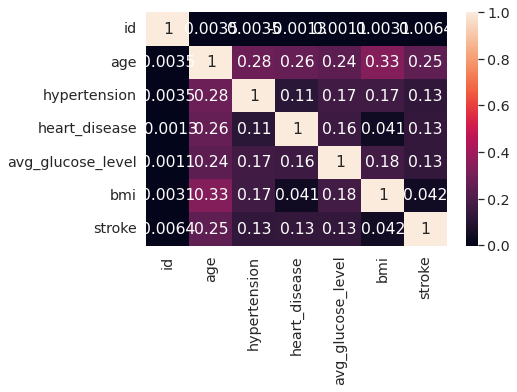

In [12]:
#plotting the correlation in the dataset
sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns, annot = True)

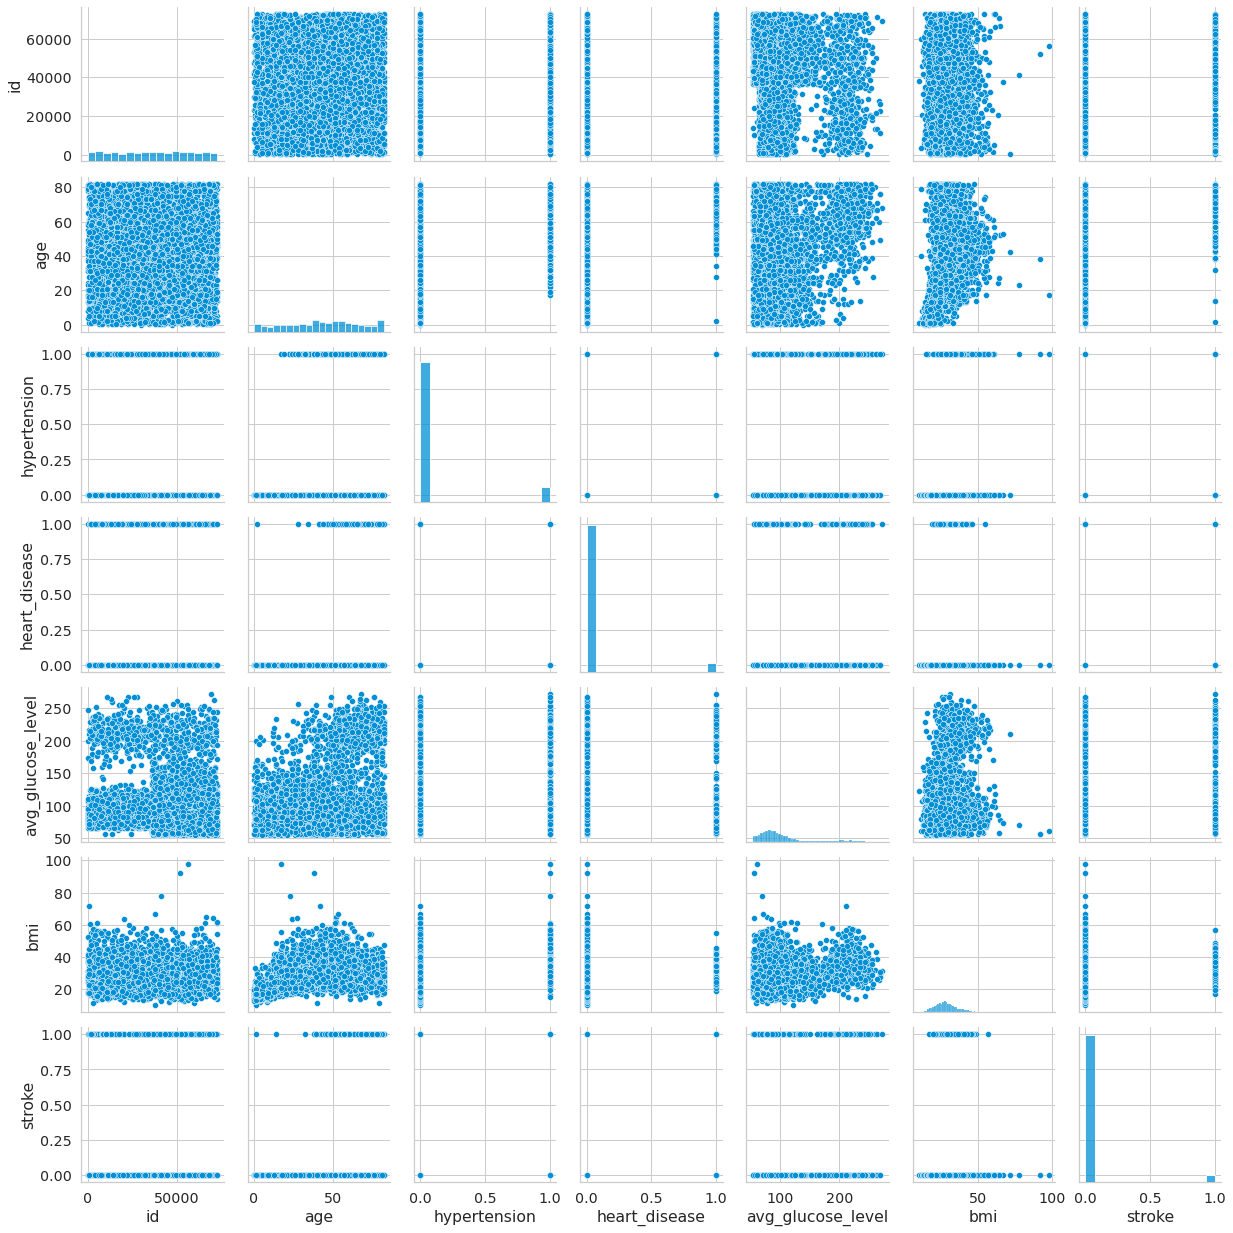

In [13]:
#visualization for seeing the correlation
sns.pairplot(dataset)

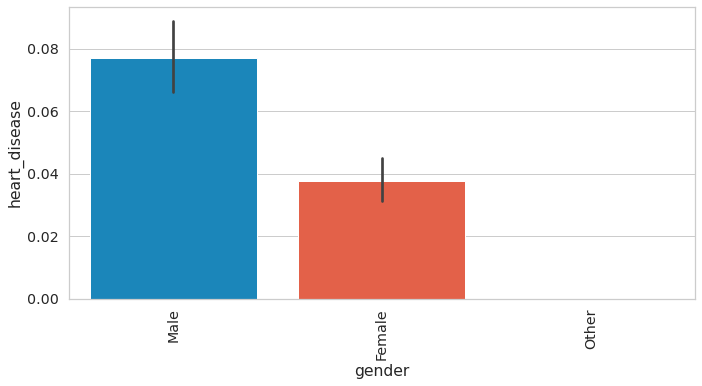

In [26]:
#visulaisation
plt.figure(figsize=(10,5))
sns.barplot(x= dataset['gender'],y= dataset['heart_disease'])
plt.xticks(rotation=90)
plt.show()

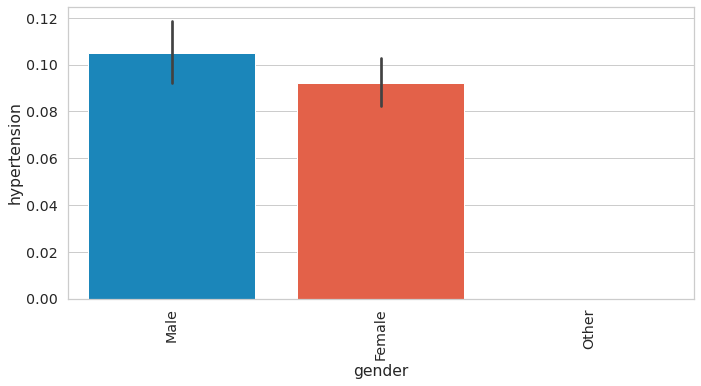

In [27]:
#visulaisation
plt.figure(figsize=(10,5))
sns.barplot(x= dataset['gender'],y= dataset['hypertension'])
plt.xticks(rotation=90)
plt.show()

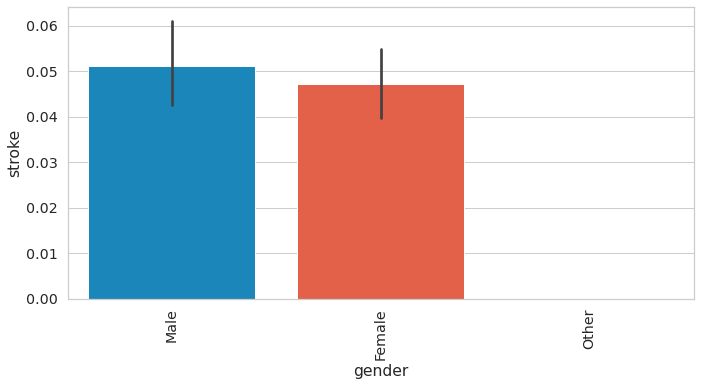

In [28]:
#visulaisation
plt.figure(figsize=(10,5))
sns.barplot(x= dataset['gender'],y= dataset['stroke'])
plt.xticks(rotation=90)
plt.show()

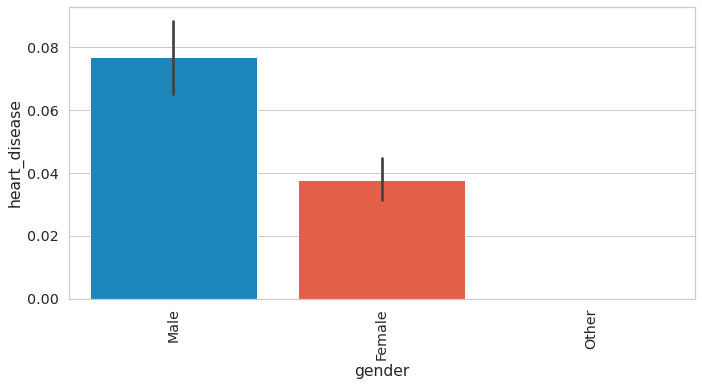

In [21]:
#visulaisation
plt.figure(figsize=(10,5))
sns.barplot(x= dataset['gender'],y= dataset['heart_disease'])
plt.xticks(rotation=90)
plt.show()

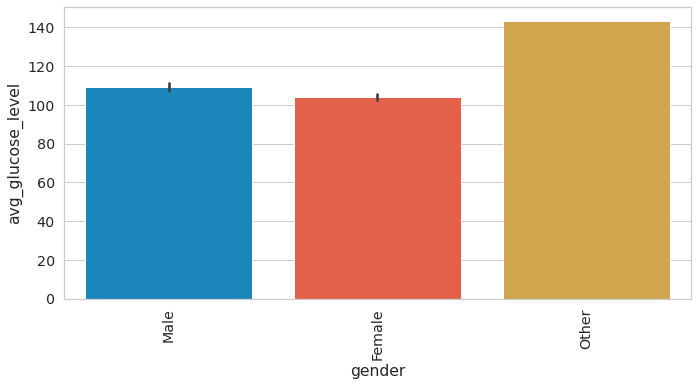

In [24]:
#visulaisation
plt.figure(figsize=(10,5))
sns.barplot(x= dataset['gender'],y= dataset['avg_glucose_level'])
plt.xticks(rotation=90)
plt.show()

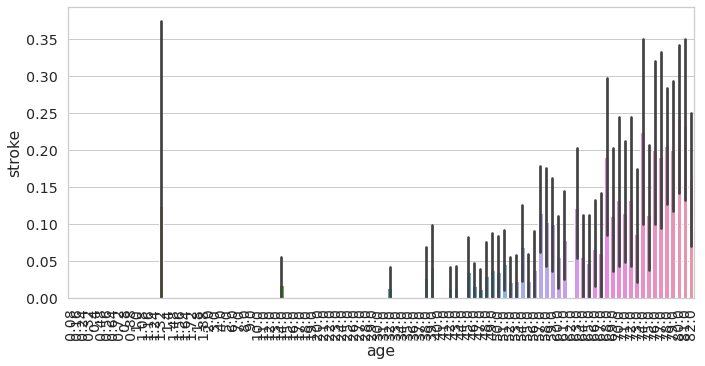

In [29]:
#visulaisation
plt.figure(figsize=(10,5))
sns.barplot(x= dataset['age'],y= dataset['stroke'])
plt.xticks(rotation=90)
plt.show()

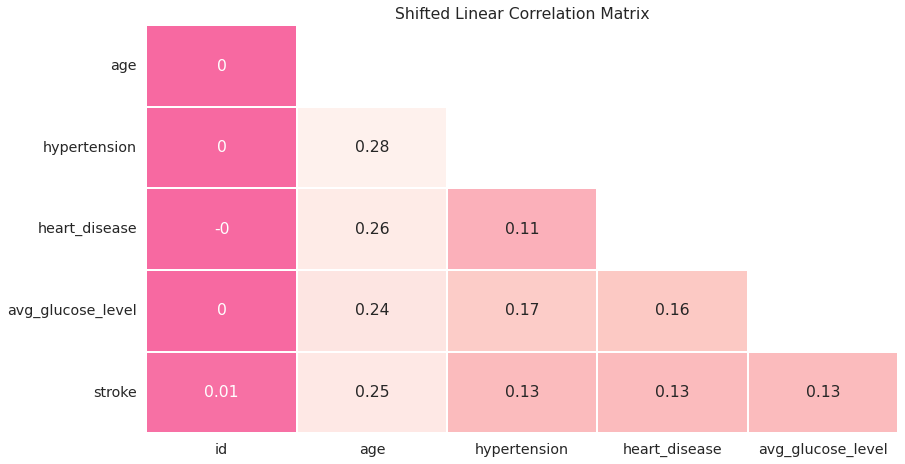

In [30]:
#Correlation function
def corrMat(dataset,id=False):
    
    corr_mat = dataset.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(dataset.drop(['bmi'],axis = 1))

In [ ]:
 # Plotting the Active cases per states
dataset.plot(kind='bar', x='gender', y='stroke',color="red", figsize=(15,6),
        title="Active cases by states", ylabel="Number of active cases")

In [ ]:
#Statistics
dataset.describe().T.style.bar(subset=['mean'], color='#606ff2')\
                            .background_gradient(subset=['std'], cmap='PuBu')\
                            .background_gradient(subset=['50%'], cmap='PuBu')

In [ ]:
#Correlation 
background_color = "#f6f5f5"

fig = plt.figure(figsize=(18, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

colors = ["#ff355d", "#f6f5f5","#ff355d"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(0, -0.5, 'Features Correlation on Train Dataset', fontsize=15, fontweight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1.5))
ax0.text(0, -0.2, 'Highest correlation in the dataset is 0.9', fontsize=9, fontweight='light')

sns.heatmap(dataset.corr(), ax=ax0, vmin=-1, vmax=1, annot=True, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap, fmt='.1f')
plt.show()